# The Big Picture and Framing the Problem

This dataset comes from the Titanic Kaggle competition. The goal is relatively simple: Build a predictive model that is able to predict which passengers survived the Titanic disaster based on their passenger data. 

https://www.kaggle.com/c/titanic

While this is a simple competition dataset, it does have potential real world applications. This type of data may be collected in a study proposed by the government to learn more about a disaster. Alternatively, it could be a business trying to learn from a failure, or simply learning more about their data. Either way, the objective would be a deeper understanding of the data and what that means in context. For a disaster, this might serve as a guiding force for future disaster response in terms of resource allocation, expectations, and considerations. For a business, the problem could have been about product defects on an assembly line based on processing steps. In that case, the model could be used to make adjustments that help eliminate defects, reduce costs, and make future predictions. 

The goal of this specific project is to accurately predict which passengers survived, with an understanding of how the model made that decision. Because the Titanic disaster is a closed off event, it's unlikely the model trained could be used on similar future data (like a modern cruise ship sinking). This is a problem in which we already have all of the data and just want to make predictions on the test set labels. Since the data comes with labels, this is a supervised classification problem. The accuracy of the predictions on the test set will serve to measure performance. 

# Data Collection

In this example we already have all of the data and it's a small dataset that is stored in a CSV file. So all we have to do is get the path to that file and load it up. 

If we didn't have the data, then we would have to get it from the logs of the ship, recorded survivors, or other researchers working on the problem. These sources would have to be verified for their trustworthiness and accuracy. We would also have to consider that the way we are collecting the data helps solve our problem while minimizing environmental noise or bias (like racial discrimination). There may also be government clearances or privacy concerns. If the data came from a variety of sources, then they would need to be converted to the same format and combined with the features properly matched. If this were a problem where we could collect more data, then we would have to consider if and when we would have enough to solve our problem. Additionally, if there was a lot of data, then we would need to consider where it's being stored (perhaps a relational database) and how to access and retrieve it. 

In [1]:
import os
import pandas as pd

In [2]:
# Assuming this notebook and the files are in the same directory 

notebook_path = os.getcwd()

train_csv = os.path.join(notebook_path, 'titanic_train.csv')
test_csv = os.path.join(notebook_path, 'titanic_test.csv')

In [3]:
titanic_data = pd.read_csv(train_csv)

In [4]:
# The test data will not be explored 
titanic_test = pd.read_csv(test_csv)

In [5]:
# Save the passenger IDs to combine with final results 
passenger_Ids = titanic_test['PassengerId']

# Data Exploration

## Types of Data

In [6]:
# Size of the dataset - this is a pretty small dataset at only 891 examples and 12 variables
titanic_data.shape

(891, 12)

In [7]:
# Let's see what the data looks like - It's structured, with many different data types
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Let's look at one family - It looks like a couple with their five children, unfortunately none of them survived

family = titanic_data[titanic_data['Name'].str.contains('Andersson')].sort_values(by='Fare')
family = family[2:]  # excluding the two that appear to be unrelated to the family based on ticket price and number
family.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S


In [9]:
# We can look at each of the columns/features, the number of non-null entries, and their data types 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We will dive a little deeper to think about what each object data type specifically represents and what that means.

Overall, on a glimpse these features and their types make sense, but we may need to read further to understand SibSp and Parch. Additionally it's clear that there is missing data, especially in the Cabin and Age features. 

In [10]:
# To see exactly how many missing values and from which features
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# It might help to look proporationally at how much of each feature is missing
titanic_data.isnull().sum() / titanic_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Age is missing almost 20%, which is bad but enough that on a small dataset like this we can handle it.

Embarked was only missing 2 values, which can be easily handled later.

Cabin however is missing over 77% of it's values. That's far too many to deal with, and considering Fare likely
scales with the room you get anyways, it's fair to just remove this feature. 

In [12]:
# Check for duplicates - this is a simple way - it's possible a name was entered differently twice
titanic_data.duplicated().sum()

0

In [13]:
# To check if the classes seem reasonably balanced and if there are any strange values in the dataset
for col in titanic_data.columns:
    print(col)
    print(titanic_data[col].value_counts())
    print("\n----------\n")

PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

----------

Survived
0    549
1    342
Name: Survived, dtype: int64

----------

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

----------

Name
Cribb, Mr. John Hatfield                        1
Olsen, Mr. Ole Martin                           1
Danoff, Mr. Yoto                                1
Cameron, Miss. Clear Annie                      1
Sinkkonen, Miss. Anna                           1
                                               ..
Harris, Mrs. Henry Birkhardt (Irene Wallach)    1
Christmann, Mr. Emil                            1
McGowan, Miss. Anna "Annie"                     1
Dooley, Mr. Patrick                             1
Blank, Mr. Henry                                1
Name: Name, Length: 891, dtype: int64

----------

Sex
male      577
female    314
Name: Sex, dtype: int64

----------

Age
24.00    

The classes in Survived, Pclass, Sex, and Embarked all seem reasonably balanced - or at least not heavily skewed. However, SibSp and Parch have some rare values.

Everything else at first glance appears to be fine.

Our target class is Survived - This is a binary variable, so we will be using a binary classification algorithm.

## Immediate Notes and Concerns

### Passenger ID
A unique identifier for each passenger. Therefore, it won't provide any additional information and can be removed. 
    
### Ticket 
Ticket number (and letters). Some tickets have multiple passengers. This is a string object that is technically categorical. However, there are far too many classes with only one value each which wouldn't provide much information. Additionally, these classes can't easily be represented as numerical data since they are not quite nominal or ordinal. Therefore, it makes sense to drop this feature. 
    
### Cabin
Cabin number - some cabins have multiple passengers. As said above, this feature has too many missing values in order to be useful. We wouldn't be able to make reasonable assumptions about which passengers would be in which cabin number. 

A more interesting feature might be: distance of room from the bow of the ship, or distance of room from lifeboat.

In [14]:
# Let's go ahead and remove those features for the rest of the data exploration
reduced_titanic_data = titanic_data.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
reduced_titanic_test = titanic_test.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
reduced_titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Descriptive Statistics

We actually already looked at the measures of frequency with the above counts and the missing value counts. 

We can also look at the measures of central tendency and spread for numerical features. The only value that could be obtained for categorical or string based data is the mode, which we already got in the above counts.  

In [15]:
reduced_titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It's possible there may be some outliers in Fare, Age, and even SibSp and Parch.

In [16]:
# We can look at the correlation measure of dependence for numerical features
reduced_titanic_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Considering we are interested in seeing if people survived, we should look at what correlates with that target. There seems to be a moderate correlation with Pclass, and a near moderate correlation with Fare. 

Looking at the other feature correlations:
Pclass has a moderate correlation with Age and Fare. 
Age has a moderate correlation with SibSp.
SibSp has a moderation correlation with Parch. 

None of these correlations are strong enough for any feature to be redundant. 

## Data Visualization

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

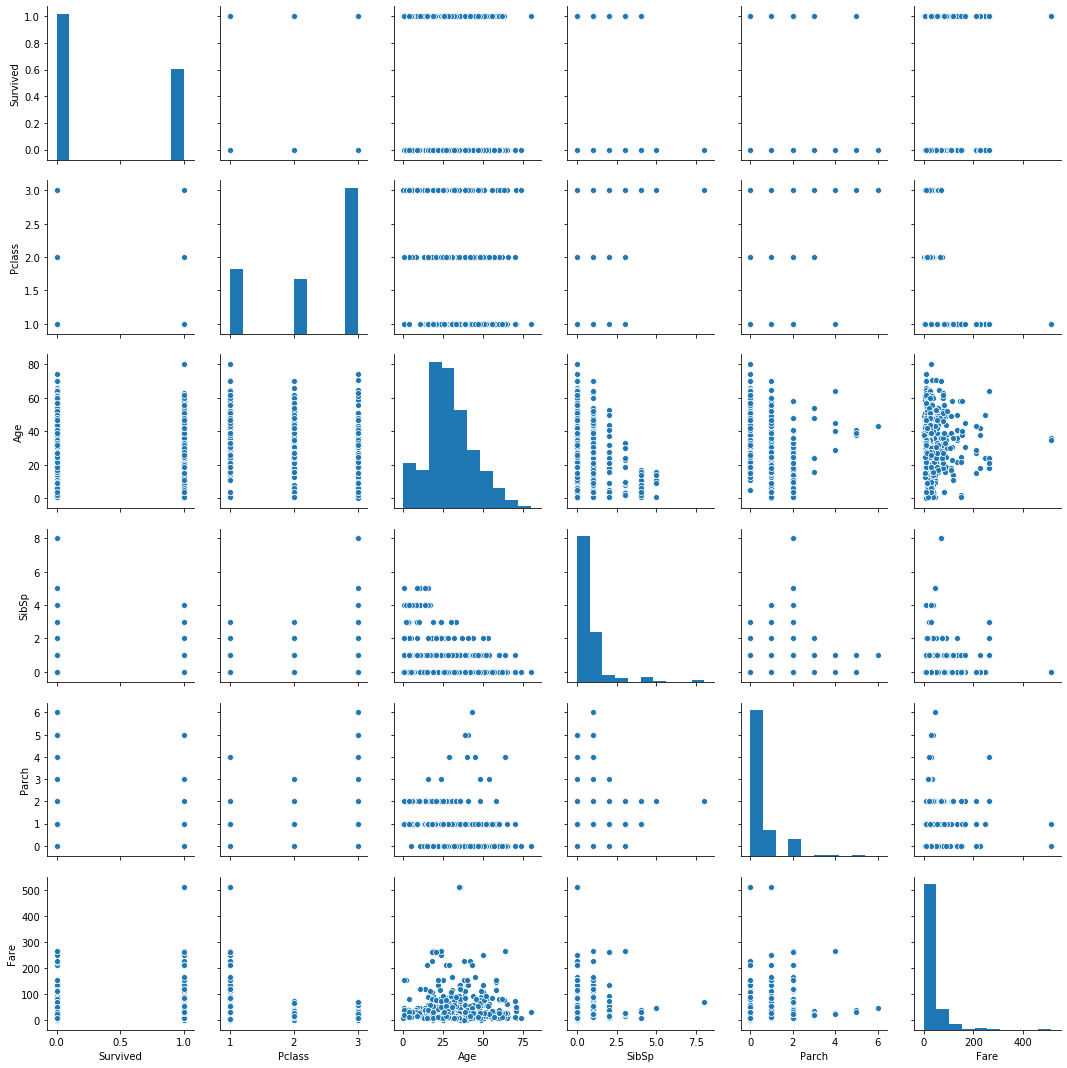

In [18]:
# To quickly look at the correlation matrix for the numerical features 
sns.pairplot(reduced_titanic_data);

This also gives a quick histogram for each feature along the diagonal. Histograms aren't great for seeing outliers, so we may want to check out boxplots. 

Age, SibSp, Parch, and Fare are all a little right skewed, with the latter three perhaps having outliers. We'll look more closely at these four features next.

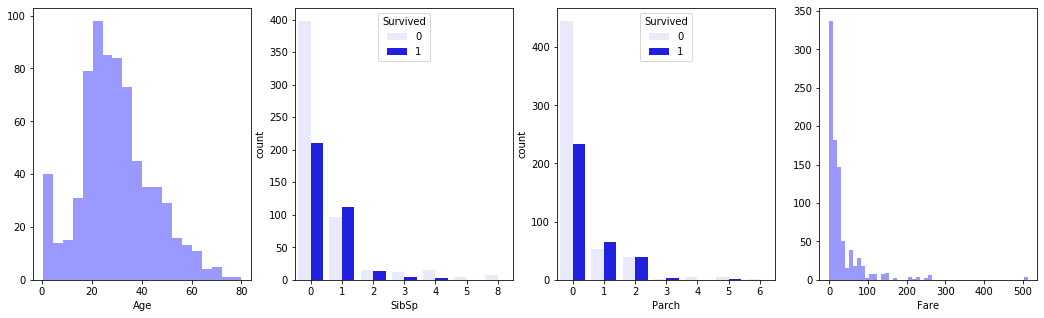

In [19]:
fig, axis = plt.subplots(1, 4, figsize=(18, 5))

age = reduced_titanic_data['Age'][reduced_titanic_data['Age'].notnull()]
sns.distplot(age, color='blue', kde=False, ax=axis[0])
sns.countplot(x='SibSp',hue='Survived', data=reduced_titanic_data, color='blue', ax=axis[1])
sns.countplot(x='Parch', hue='Survived', data=reduced_titanic_data, color='blue', ax=axis[2])
x = reduced_titanic_data['Fare']
sns.distplot(x, color='blue', kde=False, ax=axis[3]);

The age group is arguably binomonial, but only slightly right skewed.
The other three are heavily right skewed, with arguably a lot of outliers - they will need work. 

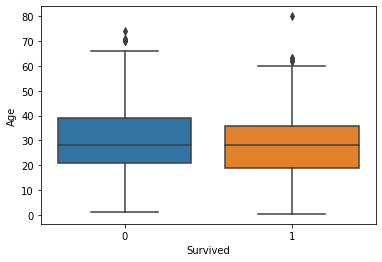

In [20]:
# Now to check each of these features boxplots for distribution and outlier information
sns.boxplot(x='Survived', y='Age' , data=reduced_titanic_data);

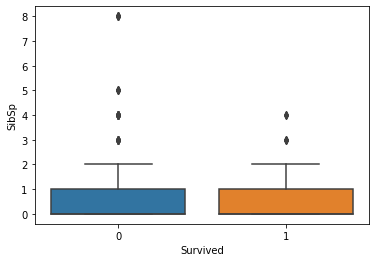

In [21]:
sns.boxplot(x='Survived', y='SibSp' , data=reduced_titanic_data);

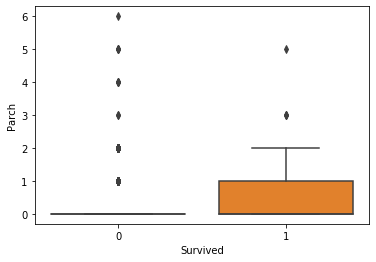

In [22]:
sns.boxplot(x='Survived', y='Parch' , data=reduced_titanic_data);

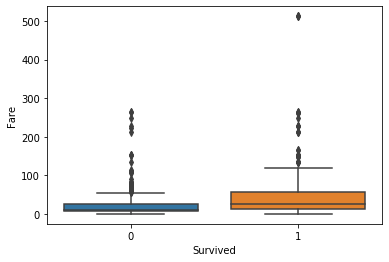

In [23]:
sns.boxplot(x='Survived', y='Fare', data=reduced_titanic_data);

As you can see, there are quite a lot of data points considered to be outliers for these features. 

We may want to transform or discretize and bucket this data.

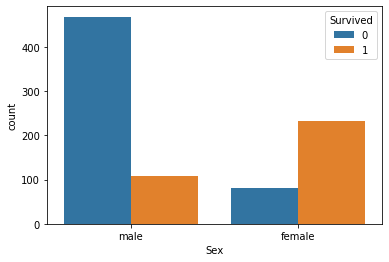

In [24]:
# Boxplots can't be used on categorical data, so let's use countplots to check these out
sns.countplot(x='Sex', hue='Survived', data=reduced_titanic_data);

Clearly we can see that women were far more likely to survive than men (0 being died, 1 being survived).

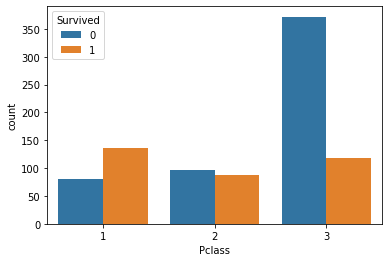

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=reduced_titanic_data);

First class and second class were far more likely to survive than third class.

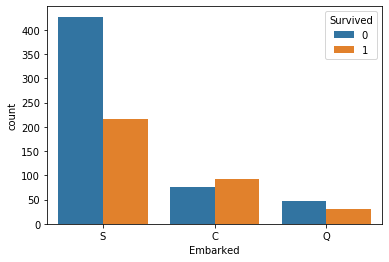

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=reduced_titanic_data);

Looks like people from S were less likely to survive.

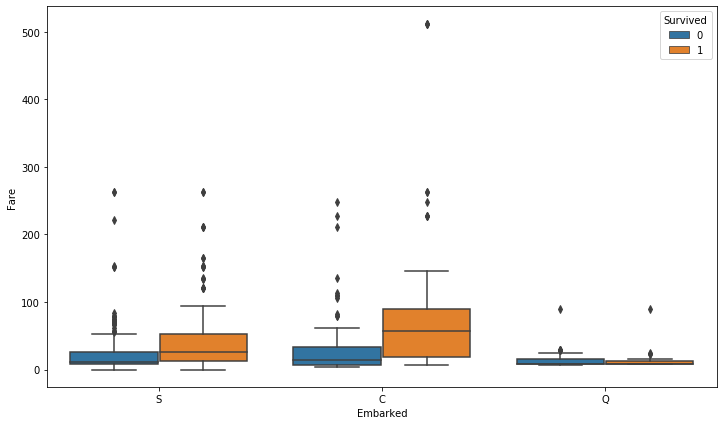

In [27]:
# Boxplots can be used on categorical features if compared to numerical features
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=reduced_titanic_data);

Hard to see because of the outliers, but there doesn't seem to be a huge difference in the Fare of passengers from different ports. There does seem to be a larger difference in Fare between those who died and survived, with the ones who survived seeming to have larger Fare's from S and C. Perhaps those ports were closer to wealthy areas, but still had a large number of people buying less expensive tickets. 

In [28]:
# I've noticed the Fare values seem to be close to 0, and as it turns out there are some literally at zero 
reduced_titanic_data[reduced_titanic_data['Fare'] == 0.0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,S


It's possible these lucky few somehow got a free ticket, or the data was entered incorrectly. They seem to interestingly all have a 0 SibSp and Parch value, indicating they are alone, which also makes sense why they're all male. They also all came from the S port and are from all three Pclasses. Because of this, I'd wager they all won a free ticket, and therefore the data should not be removed.

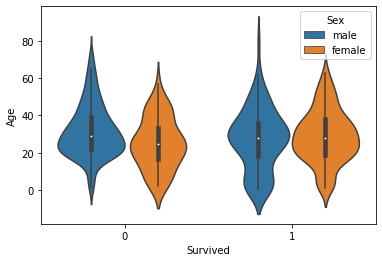

In [29]:
# Let's also check out some violin plots to compare age to different key features
sns.violinplot(x='Survived', y='Age', hue='Sex', data=reduced_titanic_data);

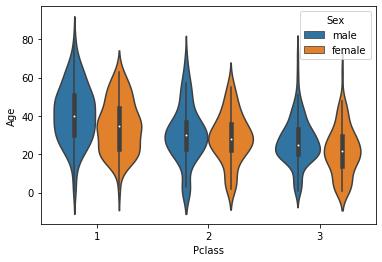

In [30]:
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=reduced_titanic_data);

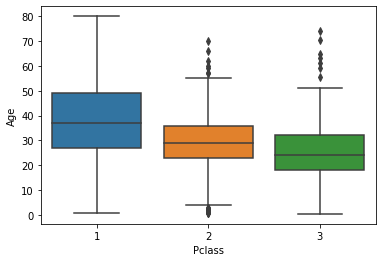

In [31]:
# Sometimes violin plots are hard to get a definitive sense of 
sns.boxplot(x='Pclass', y='Age', data=reduced_titanic_data);

Looks like the median age tends to get lower as people go down Pclasses. There's still quite a lot of outliers that will need to be dealt with. And contrary to what the violin plot appears to assume, there's no one younger than 0. 

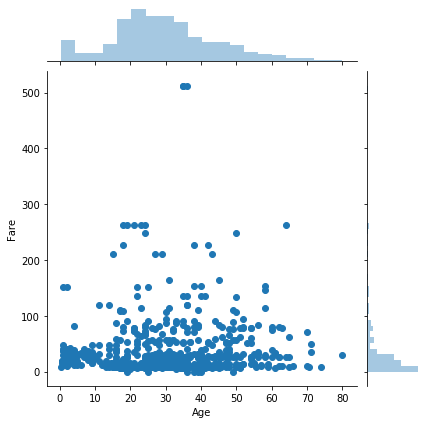

In [32]:
# Can use a jointplot to compare two numerical features
sns.jointplot(x='Age', y='Fare', data=reduced_titanic_data);

## Final Data Exploration Notes and Concerns
    
#### Survived
A binary classification - with 0 being died, 1 being survived. This is our target variable. We will want to use classification algorithms that perform binary classification. The classes aren't too skewed. A model "cheating" by saying that everyone died would only have an accuracy of 549/891 = 0.616. 

#### Pclass
Ticket class - A proxy for socio-economic status: 1 - 1st, upper; 2 - 2nd, middle; 3 - 3rd, lower. This is an ordinal categorical variable meaning that the "distance" between each class is not the same. Therefore, it is wise to keep the numerical values. 

#### Name
Being a string object that isn't necessarily categorical, it will be difficult to collect information from.

There does appear to be titles for each passenger, like Mr., Mrs., Master., and Miss. With some preprocessing we may be able to extract these out into a reasonably small number of binary variables. It's possible there's also a fame factor in who survived, but we would have to cross reference names in order to figure that out. 

#### Sex
Male or Female - A binary categorical variable. We will want to converted this to a numerical value, for instance male being 0, and female being 1. 

#### Age
In years, expressed as a fraction if less than 1, and when estimated it is in the form xx.5. Quite a wide variety, but since they appear to be reasonable they should work as numerical data. We will need to fill in missing values, however it's important to consider that a large chunk are missing. 

#### SibSp 
Number of siblings or spouses aboard the titanic. Siblings = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiances were ignored). This is a discrete numerical value.
    
#### Parch
Number of parents or children aboard the titanic. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children only travelled with a nanny, therefore parch=0 for them. So some people travelled together but weren't related. This is a discrete numerical value. 

Both SibSp and Parch are heavily right skwewed with outliers. It seems reasonable to discretize them into groupings of 0, 1, and 2 or more. 

#### Fare
Passenger fare - A continuous numerical value. Possibly has some outliers that should be removed, or the whole feature should be discretized or transformed. 

#### Embarked 
Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton. Has two missing values that will need to be handled. Each are classes, therefore it will need to be one-hot encoded.

# Data Preprocessing

### Data Cleaning 

In [33]:
reduced_titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
# Let's go ahead and see what we can do about these name titles 
import re
def get_title(name):
    title = re.search(' ([A-Za-z]+)\. ', name)
    if title:
        return title.group(1)
    return ""
all_data = [reduced_titanic_data,reduced_titanic_test]
for data in all_data:
    data['Title'] = data['Name'].apply(get_title)

for data in all_data:
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'],'Miss')
    data['Title'] = data['Title'].replace('Mme','Mrs')
    data['Title'] = data['Title'].replace(['Capt', 'Dr', 'Rev'], 'Crew')
    data['Title'] = data['Title'].replace(['Col', 'Countess', 'Don', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Sir'], 
                                          'Special')
    
print(pd.crosstab(reduced_titanic_data['Title'], reduced_titanic_data['Sex']))
print("----------------------")
print(reduced_titanic_data[['Title','Survived']].groupby(['Title'], as_index = False).mean())

Sex      female  male
Title                
Crew          1    13
Master        0    40
Miss        185     0
Mr            0   517
Mrs         126     0
Special       2     7
----------------------
     Title  Survived
0     Crew  0.214286
1   Master  0.575000
2     Miss  0.702703
3       Mr  0.156673
4      Mrs  0.793651
5  Special  0.555556


In [36]:
# No longer need the full name 
reduced_titanic_data = reduced_titanic_data.drop(columns= ["Name"])
reduced_titanic_test = reduced_titanic_test.drop(columns= ["Name"])

In [37]:
reduced_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [38]:
# With only two values missing from Embarked we can effectively just randomly choose values to fill in 
reduced_titanic_data['Embarked'].fillna(method='bfill', inplace=True)

In [39]:
# Time to fill in age on the training and test set, as well as one missing value from Fare on the test set
# I'll use median so that the imputed values aren't affected by outliers, and group by Pclass, Sex, and Embarked
age_fill = reduced_titanic_data.groupby(['Pclass', 'Sex', 'Embarked']).transform('median')

In [40]:
reduced_titanic_data.fillna(age_fill, inplace=True)
reduced_titanic_test.fillna(age_fill, inplace=True) 

### Feature Engineering

In [41]:
# Now we can also bin the values in SibSp and Parch to be 0, 1, and 2+ 
reduced_titanic_data['SibSp'] = reduced_titanic_data['SibSp'].map(lambda x: 0 if x==0 else (1 if x==1 else 2))
reduced_titanic_test['SibSp'] = reduced_titanic_test['SibSp'].map(lambda x: 0 if x==0 else (1 if x==1 else 2))

In [42]:
reduced_titanic_data['Parch'] = reduced_titanic_data['Parch'].map(lambda x: 0 if x==0 else (1 if x==1 else 2))
reduced_titanic_test['Parch'] = reduced_titanic_test['Parch'].map(lambda x: 0 if x==0 else (1 if x==1 else 2))

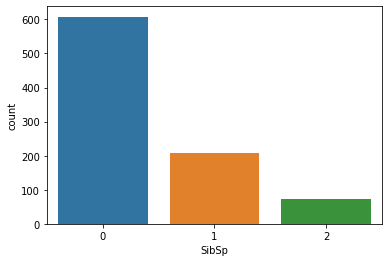

In [43]:
# These groupings look closer in value counts without outliers
sns.countplot(reduced_titanic_data['SibSp']);

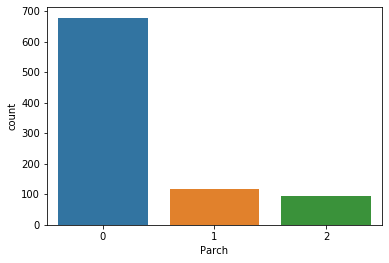

In [44]:
sns.countplot(reduced_titanic_data['Parch']);

One feature engineering step is feature creation

The only additional feature that made sense to me is to combine the total number of SibSp and Parch. This feature would be how many relations you have on board. Therefore, 0 would mean you are alone, whereas 4+ would mean you have a full family. 

In [45]:
reduced_titanic_data['Relations'] = reduced_titanic_data['SibSp'] + reduced_titanic_data['Parch']
reduced_titanic_test['Relations'] = reduced_titanic_test['SibSp'] + reduced_titanic_test['Parch']

In [46]:
reduced_titanic_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relations
Survived,1.000000,-0.338481,-0.066328,0.054203,0.121076,0.257307,0.103673
Pclass,-0.338481,1.000000,-0.413744,-0.000390,-0.010256,-0.549500,-0.006364
Age,-0.066328,-0.413744,1.000000,-0.228872,-0.260416,0.122873,-0.287613
SibSp,0.054203,-0.000390,-0.228872,1.000000,0.450499,0.192261,0.845221
Parch,0.121076,-0.010256,-0.260416,0.450499,1.000000,0.247270,0.857886
Fare,0.257307,-0.549500,0.122873,0.192261,0.247270,1.000000,0.258672
Relations,0.103673,-0.006364,-0.287613,0.845221,0.857886,0.258672,1.000000


Looking at the correlations - Relations only slightly correlates with survived, and it correlates highly with both SibSp and Parch. This may indicate that it's a redundant feature and wouldn't add much to our model. But considering that we don't have many features, it may end up helping a little. Particularly since it provides the additional information of whether or not someone is traveling alone (or with only a nanny).

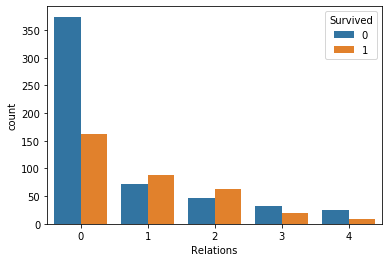

In [47]:
# It appears here that people who traveled alone were less likely to survive
sns.countplot(reduced_titanic_data['Relations'], hue=reduced_titanic_data['Survived']);

In [48]:
# Next will be encoding Sex, Embarked, and Titles to binary features
reduced_titanic_data = pd.get_dummies(reduced_titanic_data)
reduced_titanic_test = pd.get_dummies(reduced_titanic_test)

# Get rid of the redundant binary Sex feature 
reduced_titanic_data = reduced_titanic_data.drop(columns= ["Sex_male"])
reduced_titanic_test = reduced_titanic_test.drop(columns= ["Sex_male"])

In [49]:
# Transform the Fares to help reduce the outlier values and make a more normal distribution
# Unfortunately, those free tickets noted above mean that a log transformation can't immediately be used
reduced_titanic_data['Fare'].sort_values().head(20)

271    0.0000
597    0.0000
302    0.0000
633    0.0000
277    0.0000
413    0.0000
674    0.0000
263    0.0000
466    0.0000
732    0.0000
179    0.0000
806    0.0000
481    0.0000
822    0.0000
815    0.0000
378    4.0125
872    5.0000
326    6.2375
843    6.4375
818    6.4500
Name: Fare, dtype: float64

The next cheapest ticket is 4.0125. I'll replace the 0.0 values with 3.0 in order to keep the information that the
ticket was cheap, while also making the values non-zero and close to the rest of the distribution. Now a log transformation can be used to make the data more normal (less right skewed) and reduce outliers. However, the disribution of Fares was heavily right skewed, with quite a lot of outliers. Let's take a closer look. 

In [50]:
reduced_titanic_data['Fare'].sort_values().tail(30)

31     146.5208
708    151.5500
498    151.5500
305    151.5500
297    151.5500
609    153.4625
332    153.4625
268    153.4625
856    164.8667
318    164.8667
779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
380    227.5250
557    227.5250
716    227.5250
118    247.5208
299    247.5208
742    262.3750
311    262.3750
27     263.0000
88     263.0000
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, dtype: float64

It seems like there are a few major jumps in price. There's a big jump from 153 to 164 to 211, from 227 to 247, from 247 to 262, and from 263 to 512. These outliers are too large to be fixed by a log transformation considering that most of the Fare values are below roughly 30. All in all there's only roughly 20 values that are above 153, so a simple cap of 155 may be enough to solve the problem while keeping the information that these tickets were expensive. 

In [51]:
reduced_titanic_data['Fare'] = reduced_titanic_data['Fare'].replace([0.0], 3.0)
reduced_titanic_test['Fare'] = reduced_titanic_test['Fare'].replace([0.0], 3.0)

reduced_titanic_data.loc[reduced_titanic_data['Fare'] > 155.0, "Fare"] = 155.0
reduced_titanic_test.loc[reduced_titanic_test['Fare'] > 155.0, "Fare"] = 155.0

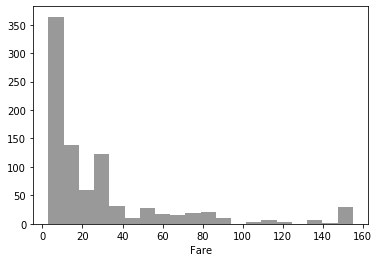

In [52]:
# This looks a little better, but still needs a log transformation
sns.distplot(reduced_titanic_data['Fare'], kde=False, color='black', bins=20);

In [53]:
reduced_titanic_data['Fare'] = reduced_titanic_data['Fare'].apply(lambda x: np.log(x))
reduced_titanic_test['Fare'] = reduced_titanic_test['Fare'].apply(lambda x: np.log(x))

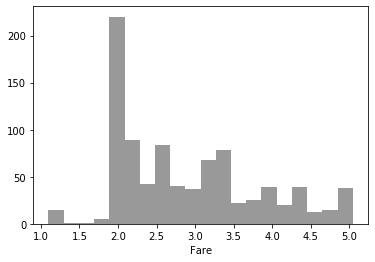

In [54]:
# Much better 
sns.distplot(reduced_titanic_data['Fare'], kde=False, color='black', bins=20);

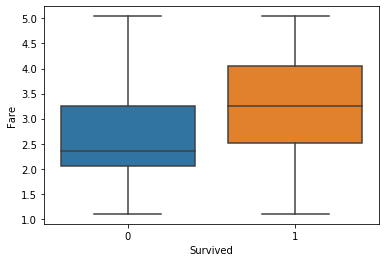

In [55]:
# And no more outliers 
sns.boxplot(x='Survived', y='Fare', data=reduced_titanic_data);

In [56]:
# The distribution looks a little better, has no outliers, and raised the correlation of Fare with Survived
reduced_titanic_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relations,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
Survived,1.000000,-0.338481,-0.066328,0.054203,0.121076,0.335905,0.103673,0.543351,0.171485,0.003650,-0.152675,-0.044050,0.085221,0.335636,-0.549199,0.341994,0.035668
Pclass,-0.338481,1.000000,-0.413744,-0.000390,-0.010256,-0.714291,-0.006364,-0.131900,-0.247223,0.221009,0.077891,-0.111470,0.082081,-0.010261,0.142698,-0.153758,-0.158201
Age,-0.066328,-0.413744,1.000000,-0.228872,-0.260416,0.159824,-0.287613,-0.113450,0.038595,-0.087234,0.020982,0.141607,-0.364583,-0.282125,0.207327,0.162598,0.133408
SibSp,0.054203,-0.000390,-0.228872,1.000000,0.450499,0.396193,0.845221,0.177623,-0.012189,-0.036673,0.033738,0.005530,0.314412,0.060237,-0.300243,0.174423,-0.028282
Parch,0.121076,-0.010256,-0.260416,0.450499,1.000000,0.382233,0.857886,0.253248,0.006824,-0.100129,0.056947,-0.038658,0.336645,0.150475,-0.369535,0.177081,-0.052676
Fare,0.335905,-0.714291,0.159824,0.396193,0.382233,1.000000,0.456834,0.266589,0.260808,-0.180551,-0.115232,0.051924,0.103219,0.106151,-0.317772,0.232553,0.049069
Relations,0.103673,-0.006364,-0.287613,0.845221,0.857886,0.456834,1.000000,0.253826,-0.002930,-0.081044,0.053507,-0.019958,0.382476,0.124744,-0.394009,0.206390,-0.047810
Sex_female,0.543351,-0.131900,-0.113450,0.177623,0.253248,0.266589,0.253826,1.000000,0.086546,0.074115,-0.122476,-0.074314,-0.159934,0.693916,-0.867334,0.550146,-0.027529
Embarked_C,0.171485,-0.247223,0.038595,-0.012189,0.006824,0.260808,-0.002930,0.086546,1.000000,-0.148802,-0.783406,-0.015088,-0.035765,0.034656,-0.075768,0.074772,0.065645
Embarked_Q,0.003650,0.221009,-0.087234,-0.036673,-0.100129,-0.180551,-0.081044,0.074115,-0.148802,1.000000,-0.498018,0.025378,0.010478,0.167531,-0.078338,-0.090432,-0.031068


In the end, the features that correlated the most with Survived are Pclass, Fare, Sex_female, Title_Miss, Title_Mr, and Title_Mrs.

### Feature Selection and Dimensionality Reduction

In this case, there are so few features that all of them will be chosen and there is no need for dimensionality reduction.

### Splitting and Scaling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
titanic_labels = reduced_titanic_data['Survived']
titanic_features = reduced_titanic_data.drop(columns='Survived')

In [59]:
# Split the training set into a train and test set (cross validation will be used in the training section)
x_train, x_test, y_train, y_test = train_test_split(titanic_features, titanic_labels, 
                                                    random_state=42, test_size=0.2)

In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
titanic_test = scaler.transform(reduced_titanic_test)

In [61]:
%store x_train
%store y_train
%store x_test
%store y_test
%store titanic_test 

Stored 'x_train' (ndarray)
Stored 'y_train' (Series)
Stored 'x_test' (ndarray)
Stored 'y_test' (Series)
Stored 'titanic_test' (ndarray)


# Model Selection

This is a binary classification supervised learning problem with a small dataset. Additionally, we'd want to have some degree of explainability in our predictions given the goal of the project. Therefore, neural networks will likely not be ideal here. Given that the dataset is small, training should not take too long. Therefore, I will do a quick first pass for a variety of models, then choose from those which will receive hyperparameter tuning. 

The models I will try are:
    - Logistic Regression
    - K Nearest Neighbors
    - Support Vector Classifier
    - Gaussian Naive Bayes
    - Linear Discriminant Analysis
    - Decision Tree
    - Random Forest
    - Gradient Boosted Classifier
    - AdaBoost
    - XGBoost

After the models have been trained, it may be useful to combine the top performers in a voting classifier ensemble.

# Training | Tuning | Metrics

In [71]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Tuning
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score

In [63]:
%store -r

In [64]:
rs = 24  # random state

models = {}
models['Logistic_Regression'] = LogisticRegression(solver='lbfgs', random_state=rs)
models['K_Nearest_Neighbors'] = KNeighborsClassifier()
models['Support_Vector_Classifier'] = SVC(random_state=rs)
models['Gaussian_Naive_Bayes'] = GaussianNB()
models['Linear_Discriminant_Analysis'] = LinearDiscriminantAnalysis()
models['Decision_Tree_Classifier'] = DecisionTreeClassifier(random_state=rs)
models['Random_Forest_Classifier'] = RandomForestClassifier(n_estimators=100, random_state=rs)
models['Gradient_Boosted_Classifier'] = GradientBoostingClassifier(random_state=rs)
models['AdaBoost_Classifier'] = AdaBoostClassifier(random_state=rs)
models['XGBoost'] = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=rs)

scores = []
for model in models.values():
    scores.append(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10))

means = []
stds = []
for score in scores:
    means.append(score.mean())
    stds.append(score.std())

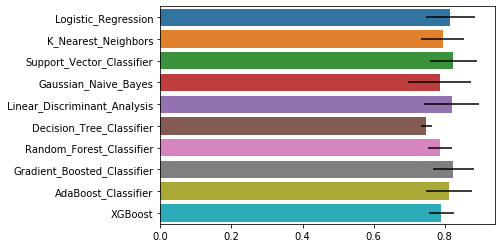

In [65]:
sns.barplot(means, list(models.keys()), **{'xerr':stds});

Based on these preliminary results and considering that our small dataset makes for quick training, I'll go 
ahead and tune all of the models except Guassian Naive Bayes and the Decision Tree Classifier. The Decision Tree Classifier performed the worst and will be outperformed by the ensemble tree methods, so I can reasonably drop it. Gaussian Naive Bayes performed the second worst and doesn't have hyperparameters for grid search to tune, therefore it wont perform better.

In [66]:
# from scikit learn website https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.02, 1.0, 20)):
  
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Logistic Regression

In [74]:
log_reg = LogisticRegression()

param_grid = {
    'penalty': ['l2'],
    'tol': [1e-8, 1e-7],
    'C': [0.3, 0.45, 0.5, 0.55, 0.7],
    'intercept_scaling': [1, 2, 3, 4, 5],
    'solver': ['liblinear'],
    'max_iter': [100, 150, 200]
}

log_reg_grid = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', verbose=1)
log_reg_grid.fit(x_train, y_train)

print(log_reg_grid.best_params_, log_reg_grid.best_score_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'C': 0.5, 'intercept_scaling': 3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-08} 0.8173904538341159


In [75]:
log_reg_best = log_reg_grid.best_estimator_
%store log_reg_best

Stored 'log_reg_best' (LogisticRegression)


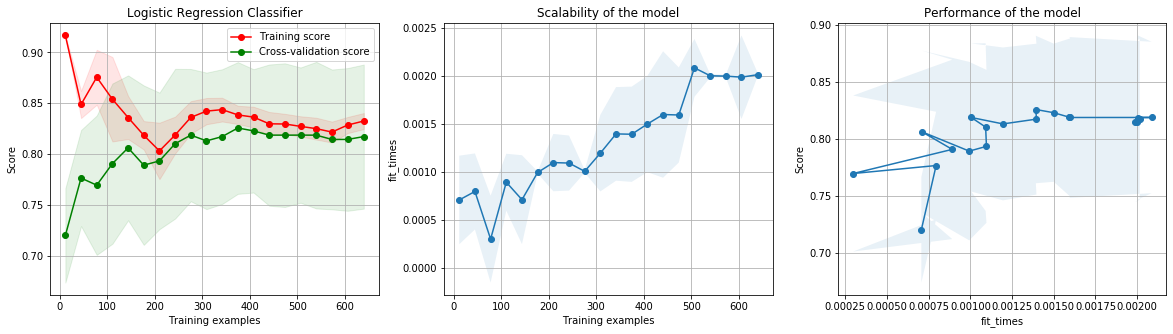

In [76]:
plot_learning_curve(log_reg_best, "Logistic Regression Classifier", x_train, y_train, cv=10);

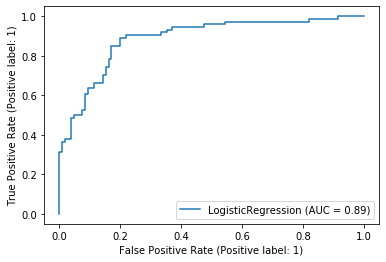

In [77]:
plot_roc_curve(log_reg_best, x_test, y_test);

In [78]:
test_acc = log_reg_best.score(x_test, y_test)

y_pred = log_reg_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.8100558659217877 
F1 Score: 0.7733333333333334


# K Neighbors Classifier

In [63]:
knn_clf = KNeighborsClassifier() 

param_grid = {
    'n_neighbors': [7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1.1, 1.2, 1.3],
}

knn_clf_grid = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', verbose=1)
knn_clf_grid.fit(x_train, y_train)

print(knn_clf_grid.best_params_, knn_clf_grid.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'leaf_size': 10, 'n_neighbors': 9, 'p': 1.3, 'weights': 'uniform'} 0.8174100156494524


In [64]:
knn_clf_best = knn_clf_grid.best_estimator_
%store knn_clf_best

Stored 'knn_clf_best' (KNeighborsClassifier)


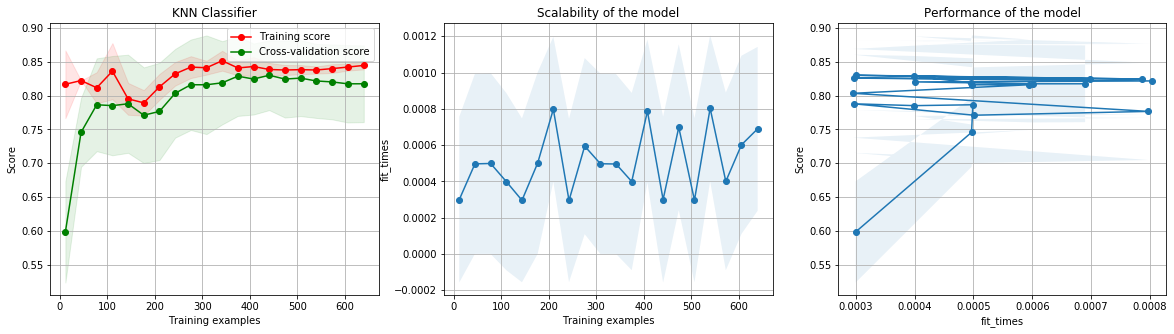

In [65]:
plot_learning_curve(knn_clf_best, "KNN Classifier", x_train, y_train, cv=10);

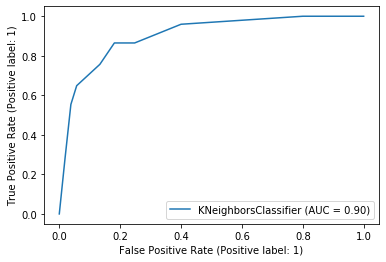

In [66]:
plot_roc_curve(knn_clf_best, x_test, y_test);

In [67]:
test_acc = knn_clf_best.score(x_test, y_test)

y_pred = knn_clf_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.8212290502793296 
F1 Score: 0.7777777777777778


# Support Vector Classifier

In [3]:
svc = SVC(probability=True)

param_grid = {
    'C': [0.7, 0.8, 0.9],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.04, 0.05, 0.06],
    #'coef0': [0.0, 1.0, 10.0],
    'tol': [1e-3]
}

svc_grid = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', verbose=1)
svc_grid.fit(x_train, y_train)

print(svc_grid.best_params_, svc_grid.best_score_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
{'C': 0.8, 'gamma': 0.05, 'kernel': 'rbf', 'tol': 0.001} 0.8314553990610328


In [4]:
svc_best = svc_grid.best_estimator_
%store svc_best

Stored 'svc_best' (SVC)


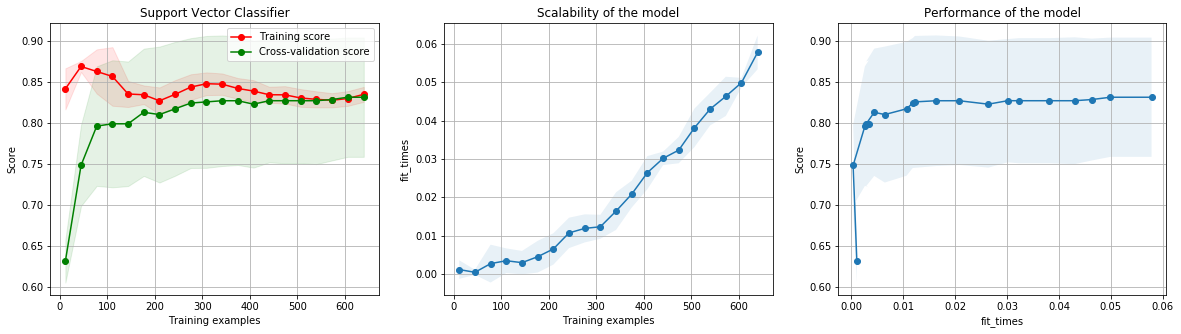

In [10]:
plot_learning_curve(svc_best, "Support Vector Classifier", x_train, y_train, cv=10);

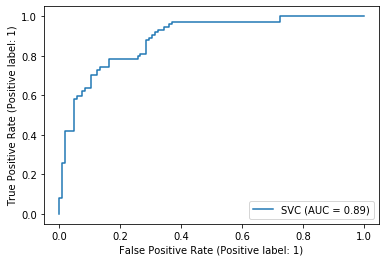

In [11]:
plot_roc_curve(svc_best, x_test, y_test);

In [12]:
test_acc = svc_best.score(x_test, y_test)

y_pred = svc_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.7988826815642458 
F1 Score: 0.7534246575342465


# Linear Discriminant Analysis

In [87]:
lda = LinearDiscriminantAnalysis()

param_grid = {
    "solver": ["svd", "lsqr"],
    #"shrinkage": ['auto'],
    "tol": [0.000001, 0.00001, 0.0001]
}

lda_grid = GridSearchCV(lda, param_grid, cv=10, scoring='accuracy', verbose=1)
lda_grid.fit(x_train, y_train)

print(lda_grid.best_params_, lda_grid.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'solver': 'svd', 'tol': 1e-06} 0.8201682316118936


In [88]:
lda_best = lda_grid.best_estimator_
%store lda_best

Stored 'lda_best' (LinearDiscriminantAnalysis)


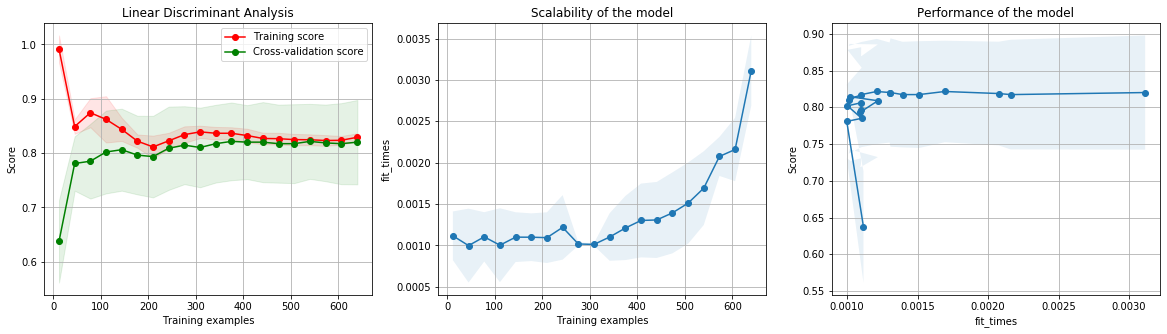

In [89]:
plot_learning_curve(lda_best, "Linear Discriminant Analysis", x_train, y_train, cv=10);

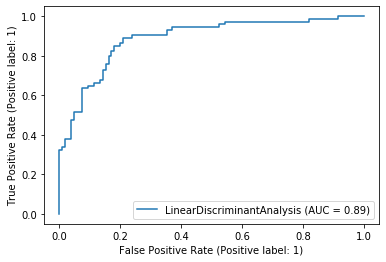

In [90]:
plot_roc_curve(lda_best, x_test, y_test);

In [91]:
test_acc = lda_best.score(x_test, y_test)

y_pred = lda_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.8156424581005587 
F1 Score: 0.7785234899328859


# Random Forest Classifier

In [99]:
forest = RandomForestClassifier()

param_grid = {
    "n_estimators": [300],
    "criterion": ["gini"],
    "max_depth": [4, 5, 6],
    "min_samples_split": [7, 8, 9],
    "min_samples_leaf": [3, 4],
    "max_features": ["auto", 4, 5, 6]
}

forest_grid = GridSearchCV(forest, param_grid, cv=10, scoring='accuracy', verbose=1)
forest_grid.fit(x_train, y_train)

print(forest_grid.best_params_, forest_grid.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 300} 0.8370892018779342


In [100]:
forest_best = forest_grid.best_estimator_
%store forest_best

Stored 'forest_best' (RandomForestClassifier)


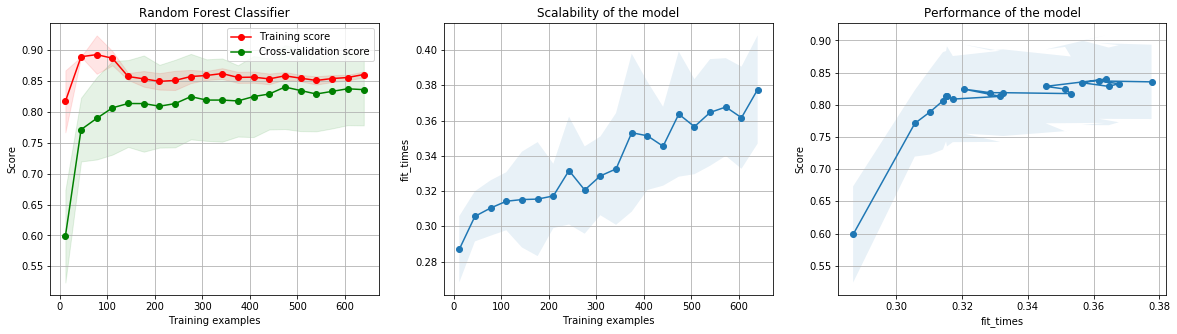

In [101]:
plot_learning_curve(forest_best, "Random Forest Classifier", x_train, y_train, cv=10);

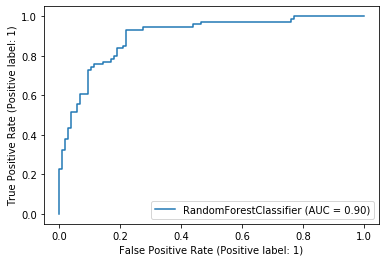

In [102]:
plot_roc_curve(forest_best, x_test, y_test);

In [103]:
test_acc = forest_best.score(x_test, y_test)

y_pred = forest_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.8212290502793296 
F1 Score: 0.7777777777777778


In [104]:
feature_importance = dict(zip(titanic_features.columns, forest_best.feature_importances_))

feature_importance
# Feature immportances are not correlations 
# They refer to the ratio of how useful each feature was when building the model

{'Pclass': 0.1085444843782133,
 'Age': 0.07006291989786462,
 'SibSp': 0.031365714129556216,
 'Parch': 0.014525843524173528,
 'Fare': 0.11872558978454237,
 'Relations': 0.04340972280954362,
 'Sex_female': 0.21934424554968493,
 'Embarked_C': 0.012043567702465929,
 'Embarked_Q': 0.0048994202648488475,
 'Embarked_S': 0.011823975582038463,
 'Title_Crew': 0.010671624076299877,
 'Title_Master': 0.010950379585945875,
 'Title_Miss': 0.04749278934412319,
 'Title_Mr': 0.2229667470650632,
 'Title_Mrs': 0.07178693501025037,
 'Title_Special': 0.0013860412953857276}

# Gradient Boosting Classifier

In [483]:
boost = GradientBoostingClassifier()

param_grid = {
    "loss": ["deviance", "exponential"],  # becomes adaboost with exponential loss
    "learning_rate": [0.03, 0.04],  # [0.05, 0.01, 0.005]
    "n_estimators": [100, 300],  # [100, 200]
    "min_samples_split": [2, 3, 4],  # [2, 6, 10]
    "min_samples_leaf": [1, 2],  # [1, 2]
    "max_depth": [2, 3, 4],  # [3, 5, 7]
    "max_features": [2, 3],  # [None, 3, 5]
    "tol": [1e-4]
}

boost_grid = GridSearchCV(boost, param_grid, cv=10, scoring='accuracy', verbose=1)
boost_grid.fit(x_train, y_train)

print(boost_grid.best_params_, boost_grid.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'learning_rate': 0.04, 'loss': 'deviance', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'tol': 0.0001} 0.8356025039123631


In [484]:
boost_best = boost_grid.best_estimator_
%store boost_best

Stored 'boost_best' (GradientBoostingClassifier)


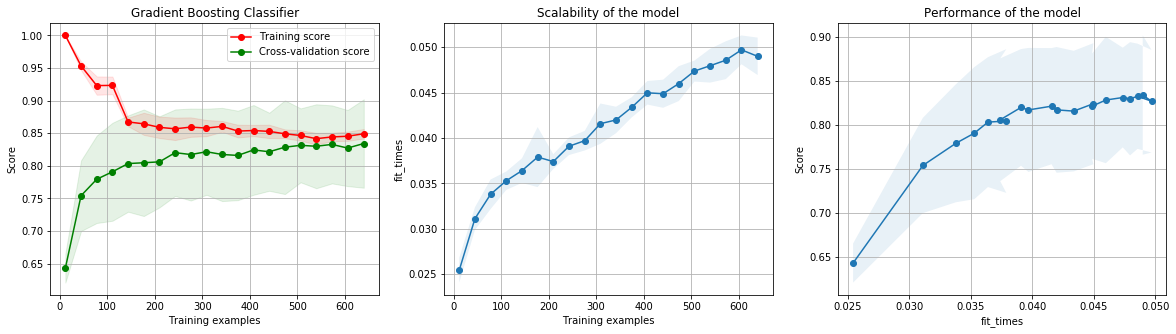

In [485]:
plot_learning_curve(boost_best, "Gradient Boosting Classifier", x_train, y_train, cv=10);

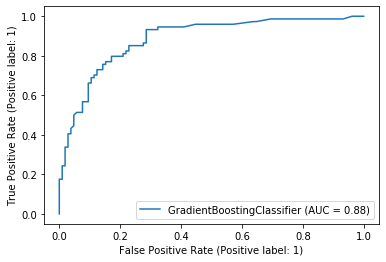

In [486]:
plot_roc_curve(boost_best, x_test, y_test);

In [487]:
test_acc = boost_best.score(x_test, y_test)

y_pred = boost_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.8044692737430168 
F1 Score: 0.7552447552447553


In [488]:
feature_importance = dict(zip(titanic_features.columns, boost_best.feature_importances_))

feature_importance

{'Pclass': 0.11461725967801961,
 'Age': 0.05413078416306952,
 'SibSp': 0.022320783402853026,
 'Parch': 0.010327362135944816,
 'Fare': 0.09852668557327778,
 'Relations': 0.030377934720233337,
 'Sex_female': 0.24436440058492256,
 'Embarked_C': 0.019907226898302537,
 'Embarked_Q': 0.004674337595626606,
 'Embarked_S': 0.012781459383664337,
 'Title_Crew': 0.007335054749435201,
 'Title_Master': 0.014396011290352295,
 'Title_Miss': 0.07306279369911198,
 'Title_Mr': 0.2025367458291048,
 'Title_Mrs': 0.08902663967967356,
 'Title_Special': 0.001614520616407987}

# AdaBoost Classifier

In [116]:
ada = AdaBoostClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.1, 0.2, 0.3]
}

ada_grid = GridSearchCV(ada, param_grid, cv=10, scoring='accuracy', verbose=1)
ada_grid.fit(x_train, y_train)

print(ada_grid.best_params_, ada_grid.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'learning_rate': 0.3, 'n_estimators': 100} 0.8215962441314554


In [117]:
ada_best = ada_grid.best_estimator_
%store ada_best

Stored 'ada_best' (AdaBoostClassifier)


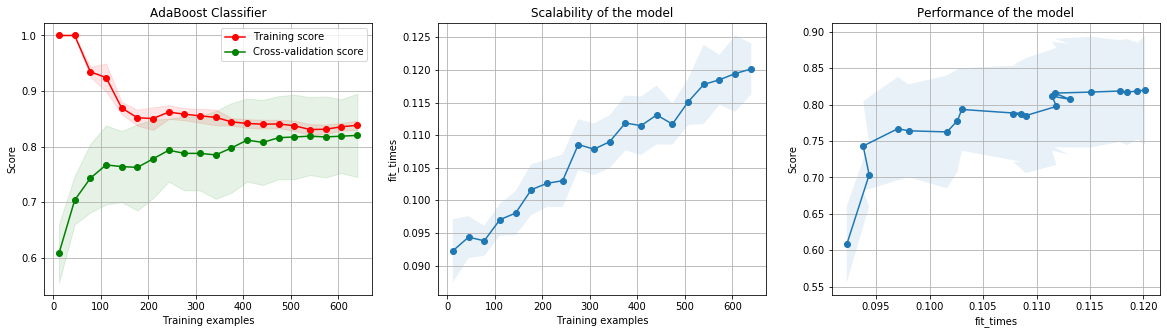

In [118]:
plot_learning_curve(ada_best, "AdaBoost Classifier", x_train, y_train, cv=10);

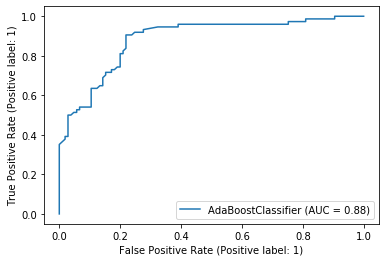

In [119]:
plot_roc_curve(ada_best, x_test, y_test);

In [120]:
test_acc = ada_best.score(x_test, y_test)

y_pred = ada_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.7932960893854749 
F1 Score: 0.7412587412587412


In [121]:
feature_importance = dict(zip(titanic_features.columns, ada_best.feature_importances_))

feature_importance

{'Pclass': 0.1,
 'Age': 0.28,
 'SibSp': 0.01,
 'Parch': 0.0,
 'Fare': 0.22,
 'Relations': 0.14,
 'Sex_female': 0.03,
 'Embarked_C': 0.01,
 'Embarked_Q': 0.0,
 'Embarked_S': 0.01,
 'Title_Crew': 0.04,
 'Title_Master': 0.03,
 'Title_Miss': 0.0,
 'Title_Mr': 0.07,
 'Title_Mrs': 0.06,
 'Title_Special': 0.0}

# XGBoost Classifier

In [150]:
xgb = XGBClassifier(eval_metric='logloss', objective="binary:logistic", use_label_encoder=False)

param_grid = {
    "n_estimators": [100],  # [100, 200]  
    "max_depth": [6, 7, 8],
    "learning_rate": [0.02],  # [0.01, 0.015, 0.02] 
    "gamma": [0.7],  # [0.6, 0.7, 0.8] 
    "min_child_weight": [1],  # [1, 3, 6, 9]
    "colsample_bytree": [0.75],  #  [0.7, 0.75, 0.8]
    "subsample": [0.9],  # [0.7, 0.8, 0.9]
    "reg_lambda": [9, 10, 11] 
}

xgb_grid = GridSearchCV(xgb, param_grid, cv=10, scoring='accuracy', verbose=1)
xgb_grid.fit(x_train, y_train)

print(xgb_grid.best_params_, xgb_grid.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'colsample_bytree': 0.75, 'gamma': 0.7, 'learning_rate': 0.02, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 10, 'subsample': 0.9} 0.8357198748043819


In [151]:
xgb_best = xgb_grid.best_estimator_
%store xgb_best

Stored 'xgb_best' (XGBClassifier)


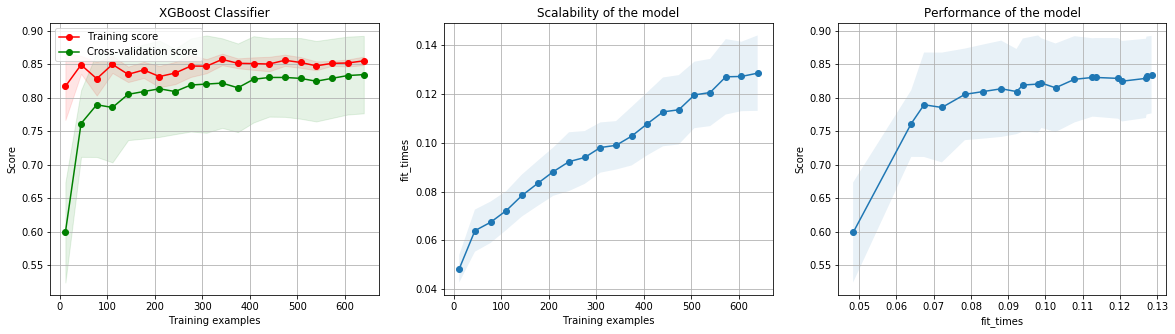

In [152]:
plot_learning_curve(xgb_best, "XGBoost Classifier", x_train, y_train, cv=10);

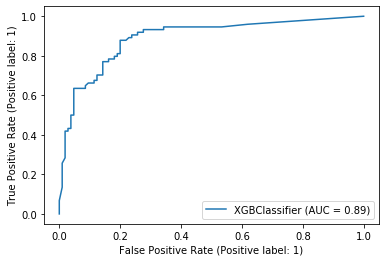

In [153]:
plot_roc_curve(xgb_best, x_test, y_test);

In [67]:
test_acc = xgb_best.score(x_test, y_test)

y_pred = xgb_best.predict(x_test)
score = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc} \nF1 Score: {score}")

Test Accuracy: 0.7988826815642458 
F1 Score: 0.7464788732394366


In [68]:
feature_importance = dict(zip(titanic_features.columns, xgb_best.feature_importances_))

feature_importance

{'Pclass': 0.06821018,
 'Age': 0.016032588,
 'SibSp': 0.016003605,
 'Parch': 0.009654891,
 'Fare': 0.016192002,
 'Relations': 0.027664924,
 'Sex_female': 0.26541686,
 'Embarked_C': 0.007551669,
 'Embarked_Q': 0.010187925,
 'Embarked_S': 0.015225843,
 'Title_Crew': 0.040841334,
 'Title_Master': 0.025855226,
 'Title_Miss': 0.029095959,
 'Title_Mr': 0.38175964,
 'Title_Mrs': 0.064800546,
 'Title_Special': 0.0055067646}

# Voting Classifier

In [72]:
voting_clf = VotingClassifier(estimators=
                             [('Log Reg', log_reg_best),
                             ('SVC', svc_best),
                             ('LDA', lda_best),
                             ('GB', boost_best),
                             ('XGB', xgb_best)],
                             voting='soft')

voting_clf = voting_clf.fit(x_train, y_train)

In [73]:
scores = cross_val_score(voting_clf, x_train, y_train, cv=10, scoring='accuracy')
print(f"Cross Validation Score: {np.mean(scores)}")

pred_score = voting_clf.score(x_test, y_test)
print(f"Test Score: {pred_score}")

Cross Validation Score: 0.8342331768388107
Test Score: 0.8156424581005587


# Present / Launch / Maintain

### Conclusions

The mean accuracy on the cross-validation sets tell how well the model fit the holdout set while training. 

The learning curves show if the training and cross validation scores converged to a high score during training, which would indicate that the model is neither overfitting or underfitting. 

The AUC gives an overall sense of how well the classifier can discriminate between the "positive" and "negative" class.

The accuracy on the test set tells how well the model generalizes to new data.

The F1 score provides a balance between recall and precision - balancing over or under predicting the positive class.

The goal of this project was to predict which passengers survived the Titanic disaster, while also perhaps getting a sense for which features were important for that prediction. Because there is not a preference for favoring the "positive" or "negative" class, we wanted the model which performed the best with an even weighting toward recall and precision. Based on these criteria, the model chosen should have high accuracy on the test set, high AUROC, and a high F1 score. 

Therefore, the model that performed best based on what I have shown in this notebook was the Random Forest Classifier. A previous hyperparameter tuning however showed that the XGBoost Classifier, followed by the Gradient Boosting Classifier, performed best on these criteria. All of these models had the added benefit of showing which features were important in the creation of the model. With all of that in mind I would have chosen that XGBoost version as the final model. However, in this case we get to test how our model performed on the final test set by submitting to Kaggle. Technically, tuning the model to get the highest score on this test set is "cheating". After submitting the original XGBoost Classifier, it did not perform as well as other models. The final XGBoost Classifier (shown in this notebook), which relied more heavily on regularization hyperparameters, is the one that performed best on Kaggle. It's final score was 0.79186, placing it within the top 8% of submissions (2935 out of 36708). 

It's possible that the right combination of models in a voting ensemble classifier could perform better. One possible combination could be: XGBoost, Gradient Boosting, LDA, SVC, and Logistic Regression. However, we would lose the ability to see which features were import in the creation of the model. 

It's interesting to me that the model with the best cross-validation and test and F1 scores did not perform the best on the final Kaggle test set. Rather, a more highly regularized model ended up generalizing better to this final test set. To me, this indicates that the distribution of the data in the final test set was different from the data in both the training and test set that the models were scored on. Considering how small of a data problem this challenge was, this isn't too surprising of a result and just goes to show that there's no guarantee how well any model will perform on additional data. 

Finally, in the case of this dataset, the model is not going to be served in a live system so there is no need to worry about launch or maintenance. 

In [74]:
test_predictions = xgb_best.predict(titanic_test)

In [75]:
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
p = passenger_Ids.to_numpy()

In [77]:
passenger_predictions = np.stack((p, test_predictions), axis=1)

In [78]:
passenger_predictions = pd.DataFrame(passenger_predictions, columns=['PassengerId', 'Survived'])

In [79]:
passenger_predictions.to_csv('titanic_test_predictions.csv', index=False)